# LRP 

### Import

In [1]:
import tensorflow as tf
import keras.applications.xception as xc
tf.compat.v1.disable_eager_execution()
import cv2
import numpy as np
import innvestigate
import matplotlib.pyplot as plt

### Load Image

In [2]:
# Load the image
image_path = "cat_image.jpg"
original_image = cv2.imread(image_path)
# Resize the image to (299, 299, 3)
resized_image = cv2.resize(original_image, (299, 299))
image = resized_image
# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


### Model

In [3]:
# Get model
model, preprocess, decode_predictions = xc.Xception(), xc.preprocess_input, xc.decode_predictions

Instructions for updating:
Colocations handled automatically by placer.


### Helper Function

In [4]:
def predictions_model(image, model):
    x = preprocess(image[None])
    predictions = model.predict(x)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}: {label} ({score:.2f})")

In [5]:
def analyze_image_lrp(image,model):
    model = innvestigate.model_wo_softmax(model)
    analyzer = innvestigate.create_analyzer("deep_taylor", model)
    x = preprocess(image[None])
    # Apply analyzer w.r.t. maximum activated output-neuron
    a = analyzer.analyze(x)
    
    # Aggregate along color channels and normalize to [-1, 1]
    a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
    a /= np.max(np.abs(a))
    # Plot
    plt.imshow(a[0], cmap="seismic", clim=(-1, 1))

In [6]:
def plot_numpy_array(array,title=''):
    plt.imshow(array)
    plt.title(title)
    plt.show()

### Use Analyzer and Plot

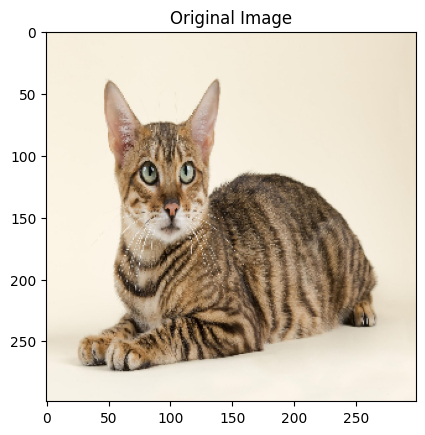

C:\Users\timBo\miniconda3\envs\DEEPL-Project\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


1: Egyptian_cat (0.67)
2: tabby (0.18)
3: tiger_cat (0.10)


In [7]:
plot_numpy_array(image,"Original Image")
predictions_model(image,model)

C:\Users\timBo\miniconda3\envs\DEEPL-Project\Lib\site-packages\tensorflow\python\client\session.py:1505: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ret = tf_session.TF_SessionRunCallable(self._session._session,


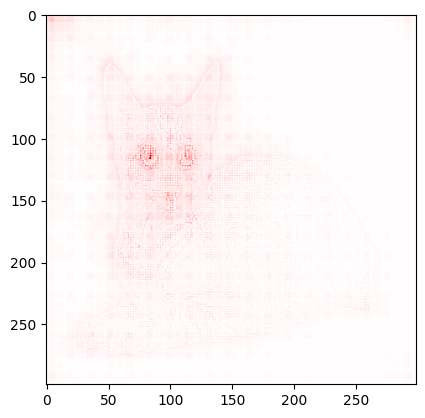

In [8]:
analyze_image_lrp(image,model)

### Add Noise to Image

In [9]:
np.random.seed(42)
noise = np.random.normal(0, 50, image.shape) 
noise_image = image + noise
noise_image = np.clip(noise_image, 0, 255).astype(np.uint8)

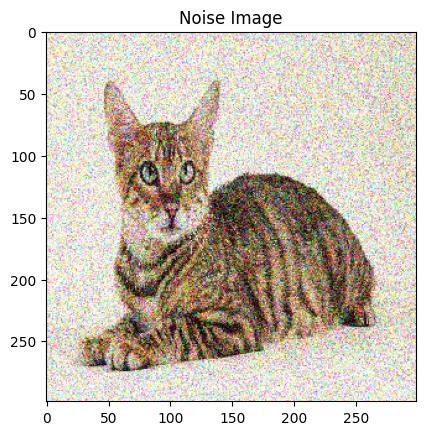

1: tabby (0.46)
2: Egyptian_cat (0.44)
3: tiger_cat (0.08)


In [10]:
plot_numpy_array(noise_image,"Noise Image")
predictions_model(noise_image,model)

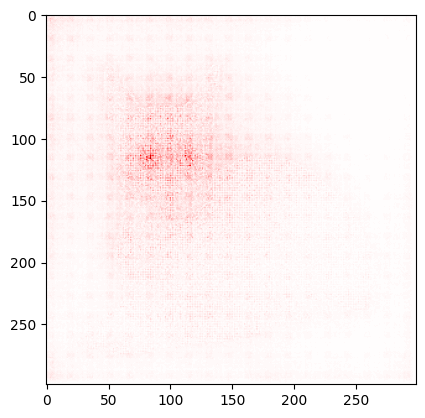

In [11]:
analyze_image_lrp(noise_image,model)

### Add Rotation

In [12]:
import numpy as np
rotated_image = np.rot90(image)

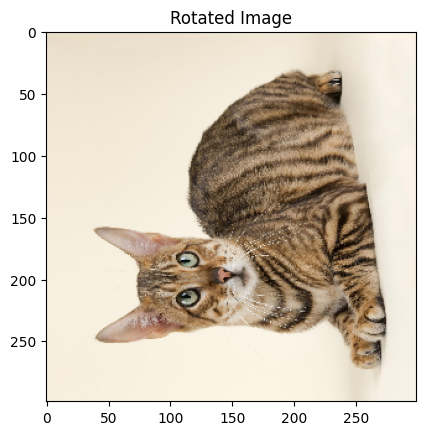

1: tabby (0.45)
2: tiger_cat (0.39)
3: Egyptian_cat (0.08)


In [13]:
plot_numpy_array(rotated_image,"Rotated Image")
predictions_model(rotated_image,model)

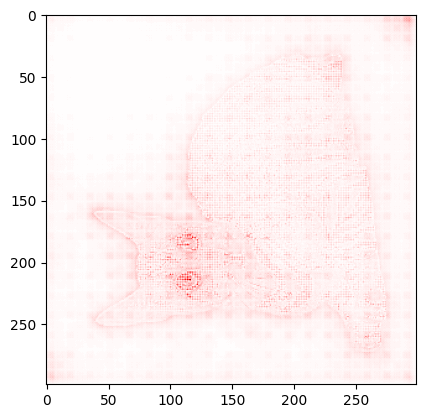

In [14]:
analyze_image_lrp(rotated_image,model)